In [1]:
!pip install opencv-python scikit-image scikit-learn matplotlib



[notice] A new release of pip is available: 25.1.1 -> 26.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC


In [17]:
import os

DATASET_PATH = "."

total = 0

for surface in ["Decks", "Pavements", "Walls"]:
    surface_path = os.path.join(DATASET_PATH, surface)

    for category in os.listdir(surface_path):
        category_path = os.path.join(surface_path, category)

        for file in os.listdir(category_path):
            if file.endswith(".jpg"):
                total += 1

print("Total Images:", total)

Total Images: 16864


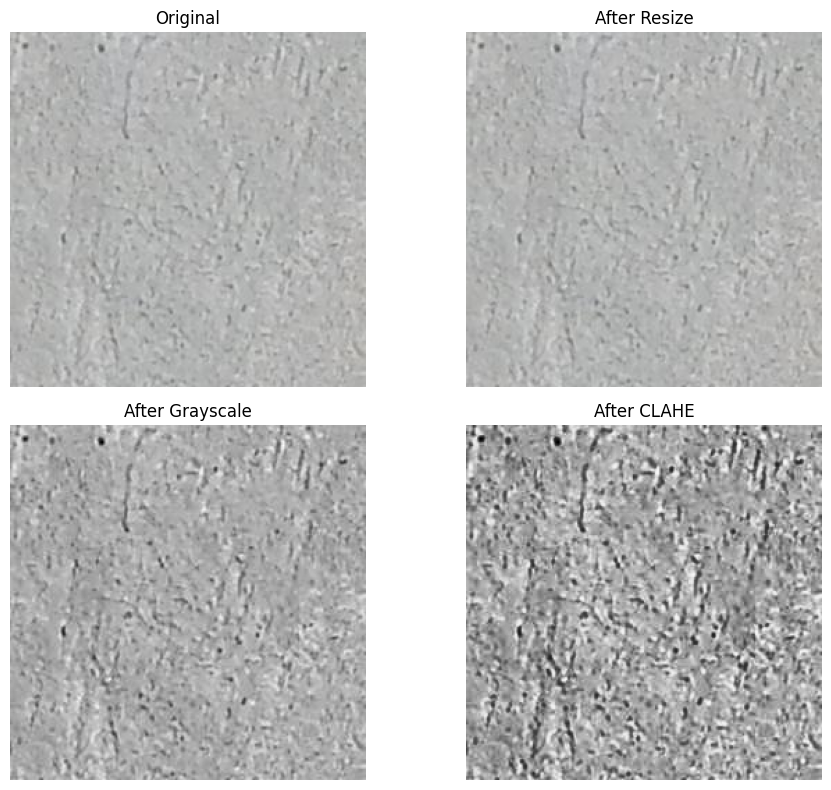

In [20]:
import cv2
import matplotlib.pyplot as plt

img = get_sample_image(DATASET_PATH)

if img is None:
    print("Image not found")
else:
    plt.figure(figsize=(10,8))

    # Original
    plt.subplot(2,2,1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title("Original")
    plt.axis("off")

    # Resize
    resized = cv2.resize(img, (256,256))
    plt.subplot(2,2,2)
    plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))
    plt.title("After Resize")
    plt.axis("off")

    # Grayscale
    gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
    plt.subplot(2,2,3)
    plt.imshow(gray, cmap="gray")
    plt.title("After Grayscale")
    plt.axis("off")

    # CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    processed = clahe.apply(gray)
    plt.subplot(2,2,4)
    plt.imshow(processed, cmap="gray")
    plt.title("After CLAHE")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

In [23]:
print("Original:", img.shape)
print("Resized:", resized.shape)

Original: (256, 256, 3)
Resized: (256, 256, 3)


In [24]:
sizes = set()

for surface in ["Decks", "Pavements", "Walls"]:
    surface_path = os.path.join(DATASET_PATH, surface)

    for category in os.listdir(surface_path):
        category_path = os.path.join(surface_path, category)

        for file in os.listdir(category_path):
            if file.endswith(".jpg"):
                img = cv2.imread(os.path.join(category_path, file))
                sizes.add(img.shape)

print("Different Image Sizes:", sizes)

Different Image Sizes: {(256, 256, 3)}


In [25]:
import os
import cv2

DATASET_PATH = "."
OUTPUT_PATH = "preprocessed_dataset"

os.makedirs(OUTPUT_PATH, exist_ok=True)

surfaces = ["Decks", "Pavements", "Walls"]

for surface in surfaces:
    surface_path = os.path.join(DATASET_PATH, surface)

    for category in os.listdir(surface_path):
        category_path = os.path.join(surface_path, category)

        if not os.path.isdir(category_path):
            continue

        save_folder = os.path.join(OUTPUT_PATH, surface, category)
        os.makedirs(save_folder, exist_ok=True)

        for file in os.listdir(category_path):
            if file.endswith(".jpg"):

                img_path = os.path.join(category_path, file)
                img = cv2.imread(img_path)

                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

                clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
                processed = clahe.apply(gray)

                save_path = os.path.join(save_folder, file)
                cv2.imwrite(save_path, processed)

print("Preprocessing completed")

Preprocessing completed
